In [2]:
#Importing the necessary libraries
import numpy as np
import glob
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
w = glob.glob(r"data\2018_WindSpeed\*.nc")
#print(w)

In [4]:
import xarray as xr
test = xr.open_mfdataset(w)

In [5]:
print(test)

<xarray.Dataset>
Dimensions:              (time: 365, lon: 520, lat: 300)
Coordinates:
  * time                 (time) datetime64[ns] 2018-01-01 ... 2018-12-31
  * lon                  (lon) float64 -25.9 -25.8 -25.7 ... 25.8 25.9 26.0
  * lat                  (lat) float64 29.9 29.8 29.7 29.6 ... 0.2 0.1 5.116e-12
Data variables:
    Wind_Speed_10m_Mean  (time, lat, lon) float32 dask.array<chunksize=(1, 300, 520), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.9.2 (http://mpimet.mpg.de/...
    history:      Fri Mar 12 15:05:04 2021: cdo splitday /archive/ESG/wit015/...
    Conventions:  CF-1.7
    CDO:          Climate Data Operators version 1.9.2 (http://mpimet.mpg.de/...


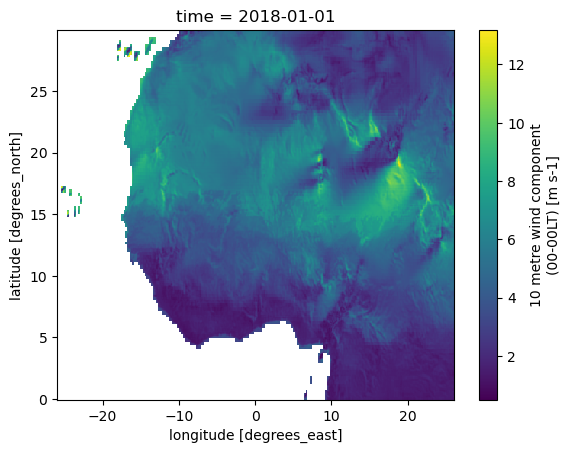

In [6]:
test.Wind_Speed_10m_Mean.isel(time=0).plot()

In [7]:
import rioxarray

test.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
test.rio.write_crs("epsg:4326", inplace=True)

<xarray.Dataset>
Dimensions:              (time: 365, lon: 520, lat: 300)
Coordinates:
  * time                 (time) datetime64[ns] 2018-01-01 ... 2018-12-31
  * lon                  (lon) float64 -25.9 -25.8 -25.7 ... 25.8 25.9 26.0
  * lat                  (lat) float64 29.9 29.8 29.7 29.6 ... 0.2 0.1 5.116e-12
    spatial_ref          int32 0
Data variables:
    Wind_Speed_10m_Mean  (time, lat, lon) float32 dask.array<chunksize=(1, 300, 520), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.9.2 (http://mpimet.mpg.de/...
    history:      Fri Mar 12 15:05:04 2021: cdo splitday /archive/ESG/wit015/...
    Conventions:  CF-1.7
    CDO:          Climate Data Operators version 1.9.2 (http://mpimet.mpg.de/...

In [8]:
import geopandas
G5_Sahel = geopandas.read_file("data\G5_Sahel_adm2N\G5_Sahel_adm2N.shp", crs="epsg:4326")

In [9]:
G5_Sahel.head()

,OBJECTID,ADMIN0NAME,ADMIN0PCOD,ADMIN1NAME,ADMIN2NAME,ADMIN1PCOD,ADMIN2PCOD,INITIAL,Shape_Leng,Shape_Area,geometry
0,1,Burkina Faso,BF,Boucle du Mouhoun,Bale,BF46,BF4601,49,4.830069,0.376722,"POLYGON ((-3.20303 12.10678, -3.20041 12.10642..."
1,2,Burkina Faso,BF,Boucle du Mouhoun,Banwa,BF46,BF4602,66,5.015746,0.490583,"POLYGON ((-4.35251 12.72334, -4.33422 12.70470..."
2,3,Burkina Faso,BF,Boucle du Mouhoun,Kossi,BF46,BF4603,90,4.115810,0.622852,"POLYGON ((-3.96085 13.38282, -3.94660 13.37672..."
3,4,Burkina Faso,BF,Boucle du Mouhoun,Mouhoun,BF46,BF4604,67,5.523416,0.571324,"POLYGON ((-3.44075 12.74873, -3.43919 12.74697..."
4,5,Burkina Faso,BF,Boucle du Mouhoun,Nayala,BF46,BF4605,76,2.757532,0.309684,"POLYGON ((-3.19718 12.98010, -3.19483 12.97864..."


In [10]:
clipped = test.rio.clip(G5_Sahel.geometry, G5_Sahel.crs, drop=True)

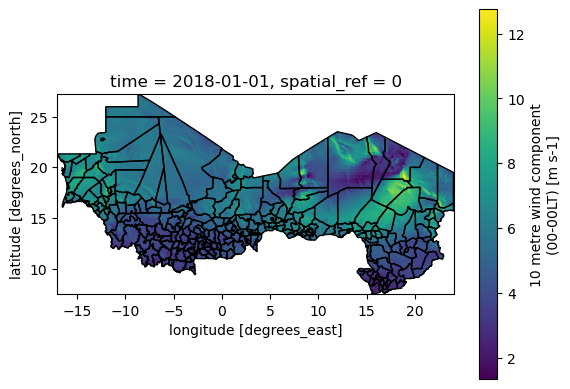

In [11]:
import matplotlib.pyplot as plt
ax=G5_Sahel.plot(facecolor='none',edgecolor='black')
sahel=clipped.Wind_Speed_10m_Mean.isel(time=0).plot(ax=ax,zorder=-1)

In [12]:
#pip install xagg
import xagg as xa

In [13]:
# Get overlap between pixels and polygons
weightmap = xa.pixel_overlaps(test, G5_Sahel, subset_bbox=False)

creating polygons for each pixel...
lat/lon bounds not found in dataset; they will be created.
calculating overlaps between pixels and output polygons...
success!


In [ ]:
aggregated = xa.aggregate(test, weightmap)

aggregating Wind_Speed_10m_Mean...


In [ ]:
ds = aggregated.to_dataset()

In [ ]:
ds.head()

In [ ]:
# Example as a pandas dataframe
df_out = aggregated.to_dataframe()
df_out

In [ ]:
ds.to_dataframe().to_csv("2018_G5_Sahel_Wind_Speed_10m_Mean.csv")